In [ ]:
import numpy as np
import pandas as pd
import json
from nltk.corpus import stopwords
import nltk
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances
#from collections import Counter

In [ ]:
data = []
for line in open('/kaggle/input/arxiv/arxiv-metadata-oai-snapshot.json', 'r'):
    data.append(json.loads(line))
df = pd.DataFrame.from_records(data)

In [ ]:
df

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
0,0704.0001,Pavel Nadolsky,"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...",Calculation of prompt diphoton production cros...,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",10.1103/PhysRevD.76.013009,ANL-HEP-PR-07-12,hep-ph,None,A fully differential calculation in perturba...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2008-11-26,"[[Balázs, C., ], [Berger, E. L., ], [Nadolsky,..."
1,0704.0002,Louis Theran,Ileana Streinu and Louis Theran,Sparsity-certifying Graph Decompositions,To appear in Graphs and Combinatorics,None,None,None,math.CO cs.CG,http://arxiv.org/licenses/nonexclusive-distrib...,"We describe a new algorithm, the $(k,\ell)$-...","[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2008-12-13,"[[Streinu, Ileana, ], [Theran, Louis, ]]"
2,0704.0003,Hongjun Pan,Hongjun Pan,The evolution of the Earth-Moon system based o...,"23 pages, 3 figures",None,None,None,physics.gen-ph,None,The evolution of Earth-Moon system is descri...,"[{'version': 'v1', 'created': 'Sun, 1 Apr 2007...",2008-01-13,"[[Pan, Hongjun, ]]"
3,0704.0004,David Callan,David Callan,A determinant of Stirling cycle numbers counts...,11 pages,None,None,None,math.CO,None,We show that a determinant of Stirling cycle...,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2007-05-23,"[[Callan, David, ]]"
4,0704.0005,Alberto Torchinsky,Wael Abu-Shammala and Alberto Torchinsky,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,None,"Illinois J. Math. 52 (2008) no.2, 681-689",None,None,math.CA math.FA,None,In this paper we show how to compute the $\L...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2013-10-15,"[[Abu-Shammala, Wael, ], [Torchinsky, Alberto, ]]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2174791,supr-con/9608008,Ruslan Prozorov,"R. Prozorov, M. Konczykowski, B. Schmidt, Y. Y...",On the origin of the irreversibility line in t...,"19 pages, LaTex, 6 PostScript figures; Author'...",None,10.1103/PhysRevB.54.15530,None,supr-con cond-mat.supr-con,None,We report on measurements of the angular dep...,"[{'version': 'v1', 'created': 'Mon, 26 Aug 199...",2009-10-30,"[[Prozorov, R., ], [Konczykowski, M., ], [Schm..."
2174792,supr-con/9609001,Durga P. Choudhury,"Durga P. Choudhury, Balam A. Willemsen, John S...",Nonlinear Response of HTSC Thin Film Microwave...,"4 pages, LaTeX type, Uses IEEE style files, 60...",None,10.1109/77.620744,None,supr-con cond-mat.supr-con,None,The non-linear microwave surface impedance o...,"[{'version': 'v1', 'created': 'Sat, 31 Aug 199...",2016-11-18,"[[Choudhury, Durga P., , Physics Department, N..."
2174793,supr-con/9609002,Durga P. Choudhury,"Balam A. Willemsen, J. S. Derov and S.Sridhar ...",Critical State Flux Penetration and Linear Mic...,"20 pages, LaTeX type, Uses REVTeX style files,...",None,10.1103/PhysRevB.56.11989,None,supr-con cond-mat.supr-con,None,The vortex contribution to the dc field (H) ...,"[{'version': 'v1', 'created': 'Tue, 3 Sep 1996...",2009-10-30,"[[Willemsen, Balam A., , Physics Department,\n..."
2174794,supr-con/9609003,Hasegawa Yasumasa,Yasumasa Hasegawa (Himeji Institute of Technol...,Density of States and NMR Relaxation Rate in A...,"7 pages, 4 PostScript Figures, LaTeX, to appea...",None,10.1143/JPSJ.65.3131,None,supr-con cond-mat.supr-con,None,We show that the density of states in an ani...,"[{'version': 'v1', 'created': 'Wed, 18 Sep 199...",2009-10-30,"[[Hasegawa, Yasumasa, , Himeji Institute of Te..."


In [ ]:
df['abstract'] = df['abstract'].str.replace('\n',' ',regex=False)
df['abstract'] = df['abstract'].str.replace('-', '',regex=False)
df['abstract'] = df['abstract'].str.replace('_', '',regex=False)
df['abstract'] = df['abstract'].str.replace('(', '',regex=False)
df['abstract'] = df['abstract'].str.replace(')', '',regex=False)
df['abstract'] = df['abstract'].str.replace('@', '',regex=False)
df['abstract'] = df['abstract'].str.replace('#', '',regex=False)
df['abstract'] = df['abstract'].str.replace('$', '',regex=False)
df['abstract'] = df['abstract'].str.replace('%', '',regex=False)
df['abstract'] = df['abstract'].str.replace('^', '',regex=False)
df['abstract'] = df['abstract'].str.replace('&', '',regex=False)
df['abstract'] = df['abstract'].str.replace('*', '',regex=False)
df['abstract'] = df['abstract'].str.replace('+', '',regex=False)
df['abstract'] = df['abstract'].str.replace('=', '',regex=False)
df['abstract'] = df['abstract'].str.replace('?', '',regex=False)
df['abstract'] = df['abstract'].str.replace('|', '',regex=False)
df['abstract'] = df['abstract'].str.replace('\\', '',regex=False)
df['abstract'] = df['abstract'].str.replace('/', '',regex=False)
df['abstract'] = df['abstract'].str.replace(':', '',regex=False)
df['abstract'] = df['abstract'].str.replace(':', '',regex=False)
df['abstract'] = df['abstract'].str.replace('<', '',regex=False)
df['abstract'] = df['abstract'].str.replace('>', '',regex=False)
df['abstract'] = df['abstract'].str.replace('[', '',regex=False)
df['abstract'] = df['abstract'].str.replace(']', '',regex=False)
df['abstract'] = df['abstract'].str.replace('{', '',regex=False)
df['abstract'] = df['abstract'].str.replace('}', '',regex=False)

df["abstract"][0]

'  A fully differential calculation in perturbative quantum chromodynamics is presented for the production of massive photon pairs at hadron colliders. All nexttoleading order perturbative contributions from quarkantiquark, gluonantiquark, and gluongluon subprocesses are included, as well as allorders resummation of initialstate gluon radiation valid at nexttonexttoleading logarithmic accuracy. The region of phase space is specified in which the calculation is most reliable. Good agreement is demonstrated with data from the Fermilab Tevatron, and predictions are made for more detailed tests with CDF and DO data. Predictions are shown for distributions of diphoton pairs produced at the energy of the Large Hadron Collider LHC. Distributions of the diphoton pairs from the decay of a Higgs boson are contrasted with those produced from QCD processes at the LHC, showing that enhanced sensitivity to the signal can be obtained with judicious selection of events. '

In [ ]:
#df['abstract'] = df['abstract'].str.replace(['-','_','(',')','@','#','$','%','^','&','*','+','=','?','|','\\','/',':',';','<','>','[',']','{','}'], '',regex=False)
df

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
0,0704.0001,Pavel Nadolsky,"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...",Calculation of prompt diphoton production cros...,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",10.1103/PhysRevD.76.013009,ANL-HEP-PR-07-12,hep-ph,None,A fully differential calculation in perturba...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2008-11-26,"[[Balázs, C., ], [Berger, E. L., ], [Nadolsky,..."
1,0704.0002,Louis Theran,Ileana Streinu and Louis Theran,Sparsity-certifying Graph Decompositions,To appear in Graphs and Combinatorics,None,None,None,math.CO cs.CG,http://arxiv.org/licenses/nonexclusive-distrib...,"We describe a new algorithm, the k,ellpebble...","[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2008-12-13,"[[Streinu, Ileana, ], [Theran, Louis, ]]"
2,0704.0003,Hongjun Pan,Hongjun Pan,The evolution of the Earth-Moon system based o...,"23 pages, 3 figures",None,None,None,physics.gen-ph,None,The evolution of EarthMoon system is describ...,"[{'version': 'v1', 'created': 'Sun, 1 Apr 2007...",2008-01-13,"[[Pan, Hongjun, ]]"
3,0704.0004,David Callan,David Callan,A determinant of Stirling cycle numbers counts...,11 pages,None,None,None,math.CO,None,We show that a determinant of Stirling cycle...,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2007-05-23,"[[Callan, David, ]]"
4,0704.0005,Alberto Torchinsky,Wael Abu-Shammala and Alberto Torchinsky,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,None,"Illinois J. Math. 52 (2008) no.2, 681-689",None,None,math.CA math.FA,None,In this paper we show how to compute the Lam...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2013-10-15,"[[Abu-Shammala, Wael, ], [Torchinsky, Alberto, ]]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2174791,supr-con/9608008,Ruslan Prozorov,"R. Prozorov, M. Konczykowski, B. Schmidt, Y. Y...",On the origin of the irreversibility line in t...,"19 pages, LaTex, 6 PostScript figures; Author'...",None,10.1103/PhysRevB.54.15530,None,supr-con cond-mat.supr-con,None,We report on measurements of the angular dep...,"[{'version': 'v1', 'created': 'Mon, 26 Aug 199...",2009-10-30,"[[Prozorov, R., ], [Konczykowski, M., ], [Schm..."
2174792,supr-con/9609001,Durga P. Choudhury,"Durga P. Choudhury, Balam A. Willemsen, John S...",Nonlinear Response of HTSC Thin Film Microwave...,"4 pages, LaTeX type, Uses IEEE style files, 60...",None,10.1109/77.620744,None,supr-con cond-mat.supr-con,None,The nonlinear microwave surface impedance of...,"[{'version': 'v1', 'created': 'Sat, 31 Aug 199...",2016-11-18,"[[Choudhury, Durga P., , Physics Department, N..."
2174793,supr-con/9609002,Durga P. Choudhury,"Balam A. Willemsen, J. S. Derov and S.Sridhar ...",Critical State Flux Penetration and Linear Mic...,"20 pages, LaTeX type, Uses REVTeX style files,...",None,10.1103/PhysRevB.56.11989,None,supr-con cond-mat.supr-con,None,The vortex contribution to the dc field H de...,"[{'version': 'v1', 'created': 'Tue, 3 Sep 1996...",2009-10-30,"[[Willemsen, Balam A., , Physics Department,\n..."
2174794,supr-con/9609003,Hasegawa Yasumasa,Yasumasa Hasegawa (Himeji Institute of Technol...,Density of States and NMR Relaxation Rate in A...,"7 pages, 4 PostScript Figures, LaTeX, to appea...",None,10.1143/JPSJ.65.3131,None,supr-con cond-mat.supr-con,None,We show that the density of states in an ani...,"[{'version': 'v1', 'created': 'Wed, 18 Sep 199...",2009-10-30,"[[Hasegawa, Yasumasa, , Himeji Institute of Te..."


In [ ]:
#df["abstract"] = df["title"]+"."+df["abstract"]

In [ ]:
df.isnull().sum()

id                      0
submitter           15189
authors                 0
title                   0
comments           499361
journal-ref       1390059
doi               1087738
report-no         2001382
categories              0
license            452871
abstract                0
versions                0
update_date             0
authors_parsed          0
dtype: int64

In [ ]:
df["categories"].unique()

array(['hep-ph', 'math.CO cs.CG', 'physics.gen-ph', ...,
       'supr-con cond-mat.mtrl-sci cond-mat.supr-con',
       'supr-con cond-mat.mtrl-sci cond-mat.supr-con nlin.PS patt-sol',
       'supr-con cond-mat.supr-con quant-ph'], dtype=object)

In [ ]:
df_cs = df

In [ ]:
drop_idx = []
for index, row in df_cs.iterrows():
    if 'cs.CL' not in row['categories']:
        drop_idx.append(index)
df_cs = df_cs.drop(drop_idx).reset_index(drop=True)
df_cs.to_csv('arxiv_cs-CL.csv', index=False)
df_cs

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
0,0704.2083,Hassan Satori,"H. Satori, M. Harti and N. Chenfour",Introduction to Arabic Speech Recognition Usin...,"4 pages, 3 figures and 2 tables, was in Inform...",None,None,None,cs.CL cs.AI,None,In this paper Arabic was investigated from t...,"[{'version': 'v1', 'created': 'Tue, 17 Apr 200...",2007-05-23,"[[Satori, H., ], [Harti, M., ], [Chenfour, N., ]]"
1,0704.2201,Hassan Satori,"H. Satori, M. Harti and N. Chenfour",Arabic Speech Recognition System using CMU-Sph...,"5 pages, 3 figures and 2 tables, in French",None,None,None,cs.CL cs.AI,None,In this paper we present the creation of an ...,"[{'version': 'v1', 'created': 'Tue, 17 Apr 200...",2007-05-23,"[[Satori, H., ], [Harti, M., ], [Chenfour, N., ]]"
2,0704.3662,Tian-Jian Jiang,"Mike Tian-Jian Jiang, James Zhan, Jaimie Lin, ...",An Automated Evaluation Metric for Chinese Tex...,8 pages,"Jiang, Mike Tian-Jian, et al. ""Robustness anal...",None,None,cs.HC cs.CL,None,"In this paper, we propose an automated evalu...","[{'version': 'v1', 'created': 'Fri, 27 Apr 200...",2013-10-29,"[[Jiang, Mike Tian-Jian, ], [Zhan, James, ], [..."
3,0704.3665,Tian-Jian Jiang,"Mike Tian-Jian Jiang, Deng Liu, Meng-Juei Hsie...",On the Development of Text Input Method - Less...,10 pages,None,None,None,cs.CL cs.HC,None,Intelligent Input Methods IM are essential f...,"[{'version': 'v1', 'created': 'Fri, 27 Apr 200...",2007-05-23,"[[Jiang, Mike Tian-Jian, ], [Liu, Deng, ], [Hs..."
4,0704.3708,Bernat Corominas-Murtra BCM,Bernat Corominas-Murtra,Network statistics on early English Syntax: St...,"New abstract. Due to a mistake, abstract from ...",None,None,None,cs.CL,None,This paper includes a reflection on the role...,"[{'version': 'v1', 'created': 'Fri, 27 Apr 200...",2007-05-23,"[[Corominas-Murtra, Bernat, ]]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40526,cs/9912009,Schwitter,Michael Hess,Deduction over Mixed-Level Logic Representatio...,"8 pages, Proceedings of the Eighth Internation...","IEEE Computer Society Press, 1996. 383-390",10.1109/TAI.1996.560480,None,cs.CL,None,A system is described that uses a mixedlevel...,"[{'version': 'v1', 'created': 'Wed, 15 Dec 199...",2016-11-15,"[[Hess, Michael, ]]"
40527,cs/9912016,Jin-Dong Kim,Jin-Dong Kim and Sang-Zoo Lee and Hae-Chang Rim,HMM Specialization with Selective Lexicalization,"7 pages, 6 figures",Proceedings of the 1999 Joint SIGDAT Conferenc...,None,None,cs.CL cs.LG,None,We present a technique which complements Hid...,"[{'version': 'v1', 'created': 'Thu, 23 Dec 199...",2007-05-23,"[[Kim, Jin-Dong, ], [Lee, Sang-Zoo, ], [Rim, H..."
40528,cs/9912017,Schwitter,Michael Hess,Mixed-Level Knowledge Representation and Varia...,29 pages,International Journal on Artificial Intelligen...,None,None,cs.CL,None,A system is described that uses a mixedlevel...,"[{'version': 'v1', 'created': 'Thu, 23 Dec 199...",2007-05-23,"[[Hess, Michael, ]]"
40529,physics/0307117,Yampol'skii,"O. V. Usatenko, V. A. Yampol'skii, K. E. Keche...",Symbolic stochastic dynamical systems viewed a...,"14 pages, 13 figures",None,10.1103/PhysRevE.68.061107,None,physics.data-an cond-mat.stat-mech cs.CL math-...,None,A theory of systems with longrange correlati...,"[{'version': 'v1', 'created': 'Wed, 23 Jul 200...",2016-09-08,"[[Usatenko, O. V., ], [Yampol'skii, V. A., ], ..."


In [ ]:
df_cs_ai = df

In [ ]:
drop_idx = []
for index, row in df_cs_ai.iterrows():
    if 'cs.AI' not in row['categories']:
        drop_idx.append(index)
df_cs_ai = df_cs_ai.drop(drop_idx).reset_index(drop=True)
df_cs_ai.to_csv('arxiv_cs_ai.csv', index=False)
df_cs_ai

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
0,0704.0047,Igor Grabec,T. Kosel and I. Grabec,Intelligent location of simultaneously active ...,"5 pages, 5 eps figures, uses IEEEtran.cls",None,None,None,cs.NE cs.AI,None,The intelligent acoustic emission locator is...,"[{'version': 'v1', 'created': 'Sun, 1 Apr 2007...",2009-09-29,"[[Kosel, T., ], [Grabec, I., ]]"
1,0704.0050,Igor Grabec,T. Kosel and I. Grabec,Intelligent location of simultaneously active ...,"5 pages, 7 eps figures, uses IEEEtran.cls",None,None,None,cs.NE cs.AI,None,Part I describes an intelligent acoustic emi...,"[{'version': 'v1', 'created': 'Sun, 1 Apr 2007...",2007-05-23,"[[Kosel, T., ], [Grabec, I., ]]"
2,0704.0304,Carlos Gershenson,Carlos Gershenson,The World as Evolving Information,"16 pages. Extended version, three more laws of...","Minai, A., Braha, D., and Bar-Yam, Y., eds. Un...",10.1007/978-3-642-18003-3_10,None,cs.IT cs.AI math.IT q-bio.PE,http://arxiv.org/licenses/nonexclusive-distrib...,This paper discusses the benefits of describ...,"[{'version': 'v1', 'created': 'Tue, 3 Apr 2007...",2013-04-05,"[[Gershenson, Carlos, ]]"
3,0704.0985,Mohd Abubakr,"Mohd Abubakr, R.M.Vinay",Architecture for Pseudo Acausal Evolvable Embe...,"4 pages, 2 figures. Submitted to SASO 2007",None,None,None,cs.NE cs.AI,None,Advances in semiconductor technology are con...,"[{'version': 'v1', 'created': 'Sat, 7 Apr 2007...",2007-05-23,"[[Abubakr, Mohd, ], [Vinay, R. M., ]]"
4,0704.1028,Jianlin Cheng,Jianlin Cheng,A neural network approach to ordinal regression,8 pages,None,None,None,cs.LG cs.AI cs.NE,None,Ordinal regression is an important type of l...,"[{'version': 'v1', 'created': 'Sun, 8 Apr 2007...",2007-05-23,"[[Cheng, Jianlin, ]]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55788,quant-ph/0203010,Fariel Shafee,Fariel Shafee,Entangled Quantum Networks,10 pages; pdf problem solved; more explanation...,"microelectronics journal, 2006",None,None,quant-ph cond-mat.dis-nn cs.AI,None,We present some results from simulation of a...,"[{'version': 'v1', 'created': 'Mon, 4 Mar 2002...",2007-05-23,"[[Shafee, Fariel, ]]"
55789,quant-ph/0205161,Diederik Aerts,Liane Gabora and Diederik Aerts,Contextualizing Concepts using a Mathematical ...,44 pages,Journal of Experimental and Theoretical Artifi...,None,None,quant-ph cs.AI q-bio.NC,None,We outline the rationale and preliminary res...,"[{'version': 'v1', 'created': 'Sun, 26 May 200...",2013-11-02,"[[Gabora, Liane, ], [Aerts, Diederik, ]]"
55790,quant-ph/0507231,Daniel Lehmann,"Daniel Lehmann, Kurt Engesser and Dov M. Gabbay",Algebras of Measurements: the logical structur...,"Submitted, 30 pages","International Journal of Theoretical Physics, ...",10.1007/s10773-006-9062-y,TR 2005-91 Leibniz Center for Research in Comp...,quant-ph cs.AI,None,"In Quantum Physics, a measurement is represe...","[{'version': 'v1', 'created': 'Sun, 24 Jul 200...",2007-05-23,"[[Lehmann, Daniel, ], [Engesser, Kurt, ], [Gab..."
55791,quant-ph/0607111,P. G. L. Porta Mana,"P. G. L. Porta Mana, A. M{\aa}nsson, G. Bj\""ork",`Plausibilities of plausibilities': an approac...,"30 pages, 3 figures. V2: clarified some points...",None,None,None,quant-ph cs.AI,None,Probabilitylike parameters appearing in some...,"[{'version': 'v1', 'created': 'Mon, 17 Jul 200...",2007-05-23,"[[Mana, P. G. L. Porta, ], [Månsson, A., ], [B..."


In [ ]:
df_ph = df

In [ ]:
drop_idx = []
for index, row in df_ph.iterrows():
    if 'physics' not in row['categories']:
        drop_idx.append(index)
df_ph = df_ph.drop(drop_idx).reset_index(drop=True)
df_ph.to_csv('arxiv_ph.csv', index=False)
df_ph

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
0,0704.0003,Hongjun Pan,Hongjun Pan,The evolution of the Earth-Moon system based o...,"23 pages, 3 figures",None,None,None,physics.gen-ph,None,The evolution of EarthMoon system is describ...,"[{'version': 'v1', 'created': 'Sun, 1 Apr 2007...",2008-01-13,"[[Pan, Hongjun, ]]"
1,0704.0021,Yuichi Togashi,"Vanessa Casagrande, Yuichi Togashi, Alexander ...",Molecular Synchronization Waves in Arrays of A...,"5 pages, 4 figures","Phys. Rev. Lett. 99, 048301 (2007)",10.1103/PhysRevLett.99.048301,None,nlin.PS physics.chem-ph q-bio.MN,None,Spatiotemporal pattern formation in a produc...,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2007-07-24,"[[Casagrande, Vanessa, ], [Togashi, Yuichi, ],..."
2,0704.0033,Maxim A. Yurkin,"Maxim A. Yurkin, Valeri P. Maltsev, Alfons G. ...",Convergence of the discrete dipole approximati...,"23 pages, 5 figures; added several corrections...","J.Opt.Soc.Am.A 23, 2578-2591 (2006); Erratum: ...",10.1364/JOSAA.23.002578 10.1364/JOSAA.32.002407,None,physics.optics physics.comp-ph,http://creativecommons.org/licenses/by-nc-nd/4.0/,We performed a rigorous theoretical converge...,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2022-03-31,"[[Yurkin, Maxim A., ], [Maltsev, Valeri P., ],..."
3,0704.0035,Maxim A. Yurkin,"Maxim A. Yurkin, Valeri P. Maltsev, Alfons G. ...",Convergence of the discrete dipole approximati...,"17 pages, 8 figures",J.Opt.Soc.Am.A 23(10): 2592-2601 (2006),10.1364/JOSAA.23.002592,None,physics.optics physics.comp-ph,None,We propose an extrapolation technique that a...,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2008-07-29,"[[Yurkin, Maxim A., ], [Maltsev, Valeri P., ],..."
4,0704.0037,Maxim A. Yurkin,"Maxim A. Yurkin, Valeri P. Maltsev, Alfons G. ...",The discrete dipole approximation for simulati...,"13 pages, 10 figures","J.Quant.Spectrosc.Radiat.Transf. 106, 546-557 ...",10.1016/j.jqsrt.2007.01.033,None,physics.optics physics.comp-ph,None,In this manuscript we investigate the capabi...,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2007-05-23,"[[Yurkin, Maxim A., ], [Maltsev, Valeri P., ],..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222615,quant-ph/9912100,Igor V. Volovich,Masanori Ohya and Igor V. Volovich,"Quantum Computing, NP-complete Problems and Ch...","11 pages, 1 figure",None,None,None,quant-ph chao-dyn cond-mat.mes-hall cs.CC nlin...,None,An approach to the solution of NPcomplete pr...,"[{'version': 'v1', 'created': 'Tue, 21 Dec 199...",2007-05-23,"[[Ohya, Masanori, ], [Volovich, Igor V., ]]"
222616,quant-ph/9912120,Matteo Beccaria,Eleonora Alfinito and Giuseppe Vitiello,Life-time and hierarchy of memory in the dissi...,"4pages, no figures, paper accepted for publica...",None,10.1142/S0217979200001734,None,quant-ph cond-mat nlin.AO physics.bio-ph q-bio,None,Some recent developments of the dissipative ...,"[{'version': 'v1', 'created': 'Thu, 30 Dec 199...",2009-10-31,"[[Alfinito, Eleonora, ], [Vitiello, Giuseppe, ]]"
222617,solv-int/9701001,Arthur Vartanian,A. V. Kitaev and A. H. Vartanian,Leading Order Temporal Asymptotics of the Modi...,"29 pages, 5 figures, LaTeX, revised version of...",None,10.1088/0266-5611/13/5/014,None,solv-int nlin.PS nlin.SI patt-sol physics.plas...,None,Using the matrix RiemannHilbert factorisatio...,"[{'version': 'v1', 'created': 'Fri, 27 Dec 199...",2009-10-30,"[[Kitaev, A. V., ], [Vartanian, A. H., ]]"
222618,solv-int/9812013,Lafortune,"S.Lafortune, P.Winternitz and C.R.Menyuk",Solutions to the Optical Cascading Equations,21 pages,"Physical Review E 58, 2518-2825 (1998)",10.1103/PhysRevE.58.2518,None,solv-int nlin.SI physics.optics,None,Group theoretical methods are used to study ...,"[{'version': 'v1', 'created': 'Fri, 11 Dec 199...",2009-10-31,"[[Lafortune, S., ], [Winternitz, P., ], [Menyu..."


In [ ]:
df_math = df

In [ ]:
df_cs_ai = pd.read_csv("/kaggle/input/ma544-project-dataset/arxiv_cs_ai.csv")
df_cs_ai

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
0,0704.0047,Igor Grabec,T. Kosel and I. Grabec,Intelligent location of simultaneously active ...,"5 pages, 5 eps figures, uses IEEEtran.cls",NaN,NaN,NaN,cs.NE cs.AI,NaN,The intelligent acoustic emission locator is...,"[{'version': 'v1', 'created': 'Sun, 1 Apr 2007...",2009-09-29,"[['Kosel', 'T.', ''], ['Grabec', 'I.', '']]"
1,0704.0050,Igor Grabec,T. Kosel and I. Grabec,Intelligent location of simultaneously active ...,"5 pages, 7 eps figures, uses IEEEtran.cls",NaN,NaN,NaN,cs.NE cs.AI,NaN,Part I describes an intelligent acoustic emi...,"[{'version': 'v1', 'created': 'Sun, 1 Apr 2007...",2007-05-23,"[['Kosel', 'T.', ''], ['Grabec', 'I.', '']]"
2,0704.0304,Carlos Gershenson,Carlos Gershenson,The World as Evolving Information,"16 pages. Extended version, three more laws of...","Minai, A., Braha, D., and Bar-Yam, Y., eds. Un...",10.1007/978-3-642-18003-3_10,NaN,cs.IT cs.AI math.IT q-bio.PE,http://arxiv.org/licenses/nonexclusive-distrib...,This paper discusses the benefits of describ...,"[{'version': 'v1', 'created': 'Tue, 3 Apr 2007...",2013-04-05,"[['Gershenson', 'Carlos', '']]"
3,0704.0985,Mohd Abubakr,"Mohd Abubakr, R.M.Vinay",Architecture for Pseudo Acausal Evolvable Embe...,"4 pages, 2 figures. Submitted to SASO 2007",NaN,NaN,NaN,cs.NE cs.AI,NaN,Advances in semiconductor technology are con...,"[{'version': 'v1', 'created': 'Sat, 7 Apr 2007...",2007-05-23,"[['Abubakr', 'Mohd', ''], ['Vinay', 'R. M.', '']]"
4,0704.1028,Jianlin Cheng,Jianlin Cheng,A neural network approach to ordinal regression,8 pages,NaN,NaN,NaN,cs.LG cs.AI cs.NE,NaN,Ordinal regression is an important type of l...,"[{'version': 'v1', 'created': 'Sun, 8 Apr 2007...",2007-05-23,"[['Cheng', 'Jianlin', '']]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55788,quant-ph/0203010,Fariel Shafee,Fariel Shafee,Entangled Quantum Networks,10 pages; pdf problem solved; more explanation...,"microelectronics journal, 2006",NaN,NaN,quant-ph cond-mat.dis-nn cs.AI,NaN,We present some results from simulation of a...,"[{'version': 'v1', 'created': 'Mon, 4 Mar 2002...",2007-05-23,"[['Shafee', 'Fariel', '']]"
55789,quant-ph/0205161,Diederik Aerts,Liane Gabora and Diederik Aerts,Contextualizing Concepts using a Mathematical ...,44 pages,Journal of Experimental and Theoretical Artifi...,NaN,NaN,quant-ph cs.AI q-bio.NC,NaN,We outline the rationale and preliminary res...,"[{'version': 'v1', 'created': 'Sun, 26 May 200...",2013-11-02,"[['Gabora', 'Liane', ''], ['Aerts', 'Diederik'..."
55790,quant-ph/0507231,Daniel Lehmann,"Daniel Lehmann, Kurt Engesser and Dov M. Gabbay",Algebras of Measurements: the logical structur...,"Submitted, 30 pages","International Journal of Theoretical Physics, ...",10.1007/s10773-006-9062-y,TR 2005-91 Leibniz Center for Research in Comp...,quant-ph cs.AI,NaN,"In Quantum Physics, a measurement is represe...","[{'version': 'v1', 'created': 'Sun, 24 Jul 200...",2007-05-23,"[['Lehmann', 'Daniel', ''], ['Engesser', 'Kurt..."
55791,quant-ph/0607111,P. G. L. Porta Mana,"P. G. L. Porta Mana, A. M{\aa}nsson, G. Bj\""ork",`Plausibilities of plausibilities': an approac...,"30 pages, 3 figures. V2: clarified some points...",NaN,NaN,NaN,quant-ph cs.AI,NaN,Probabilitylike parameters appearing in some...,"[{'version': 'v1', 'created': 'Mon, 17 Jul 200...",2007-05-23,"[['Mana', 'P. G. L. Porta', ''], ['Månsson', '..."


In [ ]:
drop_idx = []
for index, row in df_math.iterrows():
    if 'math' not in row['categories']:
        drop_idx.append(index)
df_math = df_math.drop(drop_idx).reset_index(drop=True)
df_math.to_csv('arxiv_math.csv', index=False)
df_math

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
0,0704.0002,Louis Theran,Ileana Streinu and Louis Theran,Sparsity-certifying Graph Decompositions,To appear in Graphs and Combinatorics,None,None,None,math.CO cs.CG,http://arxiv.org/licenses/nonexclusive-distrib...,"We describe a new algorithm, the k,ellpebble...","[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2008-12-13,"[[Streinu, Ileana, ], [Theran, Louis, ]]"
1,0704.0004,David Callan,David Callan,A determinant of Stirling cycle numbers counts...,11 pages,None,None,None,math.CO,None,We show that a determinant of Stirling cycle...,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2007-05-23,"[[Callan, David, ]]"
2,0704.0005,Alberto Torchinsky,Wael Abu-Shammala and Alberto Torchinsky,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,None,"Illinois J. Math. 52 (2008) no.2, 681-689",None,None,math.CA math.FA,None,In this paper we show how to compute the Lam...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2013-10-15,"[[Abu-Shammala, Wael, ], [Torchinsky, Alberto, ]]"
3,0704.0010,Sergei Ovchinnikov,Sergei Ovchinnikov,"Partial cubes: structures, characterizations, ...","36 pages, 17 figures",None,None,None,math.CO,None,Partial cubes are isometric subgraphs of hyp...,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2007-05-23,"[[Ovchinnikov, Sergei, ]]"
4,0704.0011,Clifton Cunningham,Clifton Cunningham and Lassina Dembele,Computing genus 2 Hilbert-Siegel modular forms...,14 pages; title changed; to appear in Experime...,None,None,None,math.NT math.AG,http://arxiv.org/licenses/nonexclusive-distrib...,In this paper we present an algorithm for co...,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2008-08-20,"[[Cunningham, Clifton, ], [Dembele, Lassina, ]]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572139,solv-int/9910003,Fabian Wagner,"A.J. Macfarlane, F. Wagner",Yang-Baxter Algebra for the n-Harmonic Oscilla...,"9 pages, Latex, uses amsfonts",Phys. Lett. B468 (3-4) 244-250 (1999),10.1016/S0370-2693(99)01261-7,DAMTP-1999-141,solv-int math-ph math.MP nlin.SI,None,Using a rational Rmatrix associated with the...,"[{'version': 'v1', 'created': 'Wed, 13 Oct 199...",2016-09-08,"[[Macfarlane, A. J., ], [Wagner, F., ]]"
572140,solv-int/9911004,Fis. Teorica. Valladolid.,Angel Ballesteros and Francisco J. Herranz,Integrable deformations of oscillator chains f...,"15 pages, LaTeX","J. Phys. A, 32 (1999) 8851-8862",10.1088/0305-4470/32/50/306,None,solv-int math.QA nlin.SI,None,A family of completely integrable nonlinear ...,"[{'version': 'v1', 'created': 'Wed, 3 Nov 1999...",2009-10-31,"[[Ballesteros, Angel, ], [Herranz, Francisco J..."
572141,solv-int/9911005,Alexander Sorin,"F.Delduc, A.Sorin",A note on real forms of the complex N=4 supers...,"10 pages, latex, new section, one reference an...",Nucl.Phys. B577 (2000) 461-470,10.1016/S0550-3213(00)00121-8,LPENSL-TH-20/99,solv-int hep-th math-ph math.MP nlin.SI,None,Three inequivalent real forms of the complex...,"[{'version': 'v1', 'created': 'Thu, 4 Nov 1999...",2009-10-31,"[[Delduc, F., ], [Sorin, A., ]]"
572142,solv-int/9912010,Olaf Lechtenfeld,"Olaf Lechtenfeld, Alexander Sorin",Real forms of the complex twisted N=2 supersym...,None,J.Nonlin.Math.Phys. 7 (2000) 433-444,10.2991/jnmp.2000.7.4.3,JNMP 4/2002 (Letter),solv-int hep-th math-ph math.MP nlin.SI,None,Three nonequivalent real forms of the comple...,"[{'version': 'v1', 'created': 'Wed, 15 Dec 199...",2017-02-08,"[[Lechtenfeld, Olaf, ], [Sorin, Alexander, ]]"


In [ ]:
abstract_cs = df_cs['abstract']
abstract_df_cs = abstract_cs.to_frame(name='abstract')
abstract_cs

0          In this paper Arabic was investigated from t...
1          In this paper we present the creation of an ...
2          In this paper, we propose an automated evalu...
3          Intelligent Input Methods IM are essential f...
4          This paper includes a reflection on the role...
                               ...                        
40526      A system is described that uses a mixedlevel...
40527      We present a technique which complements Hid...
40528      A system is described that uses a mixedlevel...
40529      A theory of systems with longrange correlati...
40530      Modern approaches to semanic analysis if ref...
Name: abstract, Length: 40531, dtype: object

In [ ]:
abstract_ph = df_ph['abstract']
abstract_df_ph = abstract_ph.to_frame(name='abstract')
abstract_ph

0           The evolution of EarthMoon system is describ...
1           Spatiotemporal pattern formation in a produc...
2           We performed a rigorous theoretical converge...
3           We propose an extrapolation technique that a...
4           In this manuscript we investigate the capabi...
                                ...                        
222615      An approach to the solution of NPcomplete pr...
222616      Some recent developments of the dissipative ...
222617      Using the matrix RiemannHilbert factorisatio...
222618      Group theoretical methods are used to study ...
222619      Only the known integrable cases of the Kodam...
Name: abstract, Length: 222620, dtype: object

In [ ]:
abstract_math = df_math['abstract']
abstract_df_math = abstract_math.to_frame(name='abstract')
abstract_math

0           We describe a new algorithm, the k,ellpebble...
1           We show that a determinant of Stirling cycle...
2           In this paper we show how to compute the Lam...
3           Partial cubes are isometric subgraphs of hyp...
4           In this paper we present an algorithm for co...
                                ...                        
572139      Using a rational Rmatrix associated with the...
572140      A family of completely integrable nonlinear ...
572141      Three inequivalent real forms of the complex...
572142      Three nonequivalent real forms of the comple...
572143      We discuss some algebraic aspects of the int...
Name: abstract, Length: 572144, dtype: object

In [ ]:
abstract_cs_ai = df_cs_ai['abstract']
abstract_df_cs_ai = abstract_cs_ai.to_frame(name='abstract')
abstract_cs_ai

0          The intelligent acoustic emission locator is...
1          Part I describes an intelligent acoustic emi...
2          This paper discusses the benefits of describ...
3          Advances in semiconductor technology are con...
4          Ordinal regression is an important type of l...
                               ...                        
55788      We present some results from simulation of a...
55789      We outline the rationale and preliminary res...
55790      In Quantum Physics, a measurement is represe...
55791      Probabilitylike parameters appearing in some...
55792      Graphical models of probabilistic dependenci...
Name: abstract, Length: 55793, dtype: object

In [ ]:
df_cs['categories'].value_counts().head(20)

cs.CL                  16788
cs.CL cs.AI             3309
cs.CL cs.LG             3066
cs.CL cs.AI cs.LG       1410
cmp-lg cs.CL             891
cs.CL cs.IR              690
cs.CL cs.SD eess.AS      625
cs.IR cs.CL              597
cs.CV cs.CL              530
cs.CL cs.LG stat.ML      493
cs.AI cs.CL              439
eess.AS cs.CL cs.SD      383
cs.LG cs.CL              380
cs.CL cs.IR cs.LG        356
cs.LG cs.CL stat.ML      350
cs.SD cs.CL eess.AS      299
cs.CL cs.CV              241
cs.CL cs.SI              234
cs.CV cs.CL cs.LG        229
cs.CL cs.CY              193
Name: categories, dtype: int64

In [ ]:
df_ph['categories'].value_counts().head(20)

physics.optics                      14512
physics.flu-dyn                      9243
physics.gen-ph                       6758
physics.plasm-ph                     6188
physics.atom-ph                      6050
physics.ins-det                      4637
physics.chem-ph                      4322
physics.acc-ph                       3998
physics.soc-ph                       3233
physics.ins-det hep-ex               3090
physics.app-ph                       2986
quant-ph physics.optics              2552
physics.class-ph                     2316
physics.comp-ph                      1912
physics.med-ph                       1848
physics.geo-ph                       1788
cs.SI physics.soc-ph                 1770
physics.ed-ph                        1751
physics.app-ph cond-mat.mtrl-sci     1474
physics.soc-ph cs.SI                 1413
Name: categories, dtype: int64

In [ ]:
df_math['categories'].value_counts().head(50)

math.AP                     29809
math.CO                     25991
math.PR                     21680
cs.IT math.IT               21312
math.NT                     19590
math.AG                     18476
math.DG                     14846
math.OC                     14346
math-ph math.MP             11869
math.DS                     11867
math.FA                     11777
math.NA                      9291
math.CA                      8785
math.ST stat.TH              8008
math.GT                      7843
math.NA cs.NA                7568
math.GR                      7268
math.RT                      6410
math.LO                      6022
math.RA                      5840
math.CV                      5818
math.AC                      4159
math.AT                      3869
math.OA                      3266
math.GM                      3061
math.QA                      2841
hep-th math-ph math.MP       2732
math.AP math-ph math.MP      2615
math.NT math.AG              2503
math.MG       

In [ ]:
df_cs_ai['categories'].value_counts().head(100)

cs.AI                        8087
cs.LG cs.AI                  4691
cs.CL cs.AI                  3309
cs.CV cs.AI                  2805
cs.LG cs.AI stat.ML          2633
                             ... 
cs.LG cs.AI cs.CR stat.ML      66
cs.DS cs.AI                    66
cs.LG cs.AI cs.SI              64
cs.AI cs.CC                    64
cs.AI cs.SY eess.SY            64
Name: categories, Length: 100, dtype: int64

https://arxiv.org/archive/cs
https://arxiv.org/archive/physics

In [ ]:
df_cs_csCL = df_cs.loc[df_cs['categories'] == 'cs.CL']
df_cs_csCLnAI = df_cs.loc[df_cs['categories'] == 'cs.CL cs.AI']
df_cs_csCLnLG = df_cs.loc[df_cs['categories'] == 'cs.CL cs.LG']
df_cs_csCLnAInLG = df_cs.loc[df_cs['categories'] == 'cs.CL cs.AI cs.LG']
df_cs_cmp_lgnCL = df_cs.loc[df_cs['categories'] == 'cmp-lg cs.CL']

In [ ]:
df_ph_optics = df_ph.loc[df_ph['categories'] == 'physics.optics']
df_ph_flu_dyn = df_ph.loc[df_ph['categories'] == 'physics.flu-dyn']
df_ph_gen_ph = df_ph.loc[df_ph['categories'] == 'physics.gen-ph']
df_ph_plasm_ph = df_ph.loc[df_ph['categories'] == 'physics.plasm-ph']
df_ph_atom_ph = df_ph.loc[df_ph['categories'] == 'physics.atom-ph']

In [ ]:
df_math_AP = df_math.loc[df_math['categories'] == 'math.AP']
df_math_CO = df_math.loc[df_math['categories'] == 'math.CO']
df_math_PR = df_math.loc[df_math['categories'] == 'math.PR']
df_math_cs_ITnmath_IT = df_math.loc[df_math['categories'] == 'cs.IT math.IT']
df_math_NT = df_math.loc[df_math['categories'] == 'math.NT']

In [ ]:
df_cs_ai_AI = df_cs_ai.loc[df_cs_ai['categories'] == 'cs.AI']
df_cs_ai_AI = df_cs_ai_AI['abstract']
df_cs_ai_AI=df_cs_ai_AI.to_frame()

df_cs_ai_LG = df_cs_ai.loc[df_cs_ai['categories'] == 'cs.LG cs.AI']
df_cs_ai_LG = df_cs_ai_LG['abstract']
df_cs_ai_LG=df_cs_ai_LG.to_frame()

df_cs_ai_CL = df_cs_ai.loc[df_cs_ai['categories'] == 'cs.CL cs.AI']
df_cs_ai_CL = df_cs_ai_CL['abstract']
df_cs_ai_CL=df_cs_ai_CL.to_frame()

df_cs_ai_CV = df_cs_ai.loc[df_cs_ai['categories'] == 'cs.CV cs.AI']
df_cs_ai_CV = df_cs_ai_CV['abstract']
df_cs_ai_CV=df_cs_ai_CV.to_frame()

df_cs_ai_LGnML = df_cs_ai.loc[df_cs_ai['categories'] == 'cs.LG cs.AI stat.ML']
df_cs_ai_LGnML = df_cs_ai_LGnML['abstract']
df_cs_ai_LGnML=df_cs_ai_LGnML.to_frame()

In [ ]:
df_cs_ai_LGnML_list = df_cs_ai_LGnML.abstract.to_list()

In [ ]:
df_cs_ai_AInDS = df_cs_ai.loc[df_cs_ai['categories'] == 'cs.DS cs.AI']
df_cs_ai_AInDS = df_cs_ai_AInDS['abstract']
df_cs_ai_AInDS=df_cs_ai_AInDS.to_frame()

df_cs_ai_AInDS_list = df_cs_ai_AInDS.abstract.to_list()

In [ ]:
target = df_cs_ai_AInDS_list[1]

In [ ]:
sentences_similarity = np.zeros(len(df_cs_ai_AInDS_list))
sentences_similarity.shape

(66,)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pprint
from gensim.models import word2vec
from gensim.models import KeyedVectors
%matplotlib inline

In [ ]:
#w2v = word2vec.Word2Vec()
w2v = KeyedVectors.load_word2vec_format("/kaggle/input/googlenewsvectorsnegative300/GoogleNews-vectors-negative300.bin", binary=True)

In [ ]:
w2v_vocab = list(w2v.index_to_key)
print("Loaded {} words in vocabulary".format(len(w2v_vocab)))

Loaded 3000000 words in vocabulary


In [ ]:
target_sentence_words = [w for w in target.split() if w in w2v_vocab]
for idx, sentence in enumerate(df_cs_ai_AInDS_list):
    sentence_words = [w for w in sentence.split() if w in w2v_vocab]
    sim = w2v.n_similarity(target_sentence_words, sentence_words)
    sentences_similarity[idx] = sim

result = list(zip(sentences_similarity, df_cs_ai_AInDS_list))
result.sort(key=lambda item:item[0], reverse=True)
print("Target:", target)
pprint.pprint(result)

Target:   Many important problems in discrete optimization require maximization of a monotonic submodular function subject to matroid constraints. For these problems, a simple greedy algorithm is guaranteed to obtain nearoptimal solutions. In this article, we extend this classic result to a general class of adaptive optimization problems under partial observability, where each choice can depend on observations resulting from past choices. Specifically, we prove that a natural adaptive greedy algorithm provides a 1p1 approximation for the problem of maximizing an adaptive monotone submodular function subject to p matroid constraints, and more generally over arbitrary pindependence systems. We illustrate the usefulness of our result on a complex adaptive matchmaking application. 
[(1.0,
  '  Many important problems in discrete optimization require maximization of '
  'a monotonic submodular function subject to matroid constraints. For these '
  'problems, a simple greedy algorithm is gua

In [ ]:
result[0]

(1.0,
 '  Many important problems in discrete optimization require maximization of a monotonic submodular function subject to matroid constraints. For these problems, a simple greedy algorithm is guaranteed to obtain nearoptimal solutions. In this article, we extend this classic result to a general class of adaptive optimization problems under partial observability, where each choice can depend on observations resulting from past choices. Specifically, we prove that a natural adaptive greedy algorithm provides a 1p1 approximation for the problem of maximizing an adaptive monotone submodular function subject to p matroid constraints, and more generally over arbitrary pindependence systems. We illustrate the usefulness of our result on a complex adaptive matchmaking application. ')

In [ ]:
target

'  Many important problems in discrete optimization require maximization of a monotonic submodular function subject to matroid constraints. For these problems, a simple greedy algorithm is guaranteed to obtain nearoptimal solutions. In this article, we extend this classic result to a general class of adaptive optimization problems under partial observability, where each choice can depend on observations resulting from past choices. Specifically, we prove that a natural adaptive greedy algorithm provides a 1p1 approximation for the problem of maximizing an adaptive monotone submodular function subject to p matroid constraints, and more generally over arbitrary pindependence systems. We illustrate the usefulness of our result on a complex adaptive matchmaking application. '

In [ ]:
result[1]

(0.9138081669807434,
 '  We consider the problem of maximizing a nonmonotone DRsubmodular function subject to a cardinality constraint. Diminishing returns DR submodularity is a generalization of the diminishing returns property for functions defined over the integer lattice. This generalization can be used to solve many machine learning or combinatorial optimization problems such as optimal budget allocation, revenue maximization, etc. In this work we propose the first polynomialtime approximation algorithms for nonmonotone constrained maximization. We implement our algorithms for a revenue maximization problem with a realworld dataset to check their efficiency and performance. ')

In [ ]:
result[2]

(0.9112434983253479,
 '  Treewidth and hypertree width have proven to be highly successful structural parameters in the context of the Constraint Satisfaction Problem CSP. When either of these parameters is bounded by a constant, then CSP becomes solvable in polynomial time. However, here the order of the polynomial in the running time depends on the width, and this is known to be unavoidable; therefore, the problem is not fixedparameter tractable parameterized by either of these width measures. Here we introduce an enhancement of tree and hypertree width through a novel notion of thresholds, allowing the associated decompositions to take into account information about the computational costs associated with solving the given CSP instance. Aside from introducing these notions, we obtain efficient theoretical as well as empirical algorithms for computing threshold treewidth and hypertree width and show that these parameters give rise to fixedparameter algorithms for CSP as well as other

In [ ]:
result[3]

(0.9053468108177185,
 '  We address a family of hard benchmark instances for the Simple Plant Location Problem also known as the Uncapacitated Facility Location Problem. The recent attempt by Fischetti et al. to tackle the K"orkelGhosh instances resulted in seven new optimal solutions and 22 improved upper bounds. We use automated generation of heuristics to obtain a new algorithm for the Simple Plant Location Problem. In our experiments, our new algorithm matched all the previous best known and optimal solutions, and further improved 12 upper bounds, all within shorter time budgets compared to the previous efforts.   Our algorithm design process is split into two phases i development of algorithmic components such as local search procedures and mutation operators, and ii composition of a metaheuristic from the available components. Phase i requires human expertise and often can be completed by implementing several simple domainspecific routines known from the literature. Phase ii is e

In [ ]:
from wordcloud import WordCloud, STOPWORDS

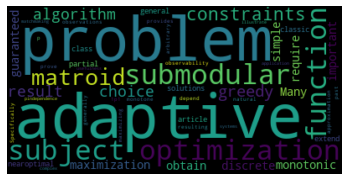

In [ ]:
word_cloud = WordCloud(collocations = False).generate(target)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

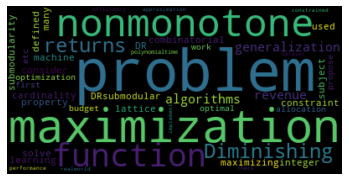

In [ ]:
word_cloud = WordCloud(collocations = False).generate(result[1][1])
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

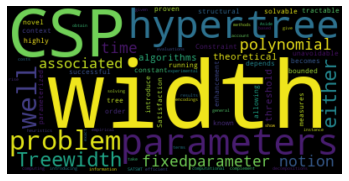

In [ ]:
word_cloud = WordCloud(collocations = False).generate(result[2][1])
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

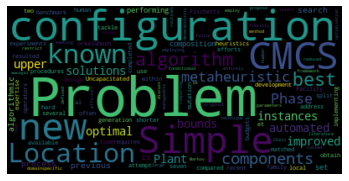

In [ ]:
word_cloud = WordCloud(collocations = False).generate(result[3][1])
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()